In [19]:
%matplotlib inline
# This source code is licensed under the license found in the
# LICENSE file in the root directory of this source tree.
# --------------------------------------------------------
# References:
# Sagittarius to https://github.com/addiewc/Sagittarius
# --------------------------------------------------------
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from importlib import reload
import plot_settings
import plot_utils
plt.style.use('seaborn-white')
fig_dir = 'Figures/'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

results_root = '/Users/mark/Desktop/results'


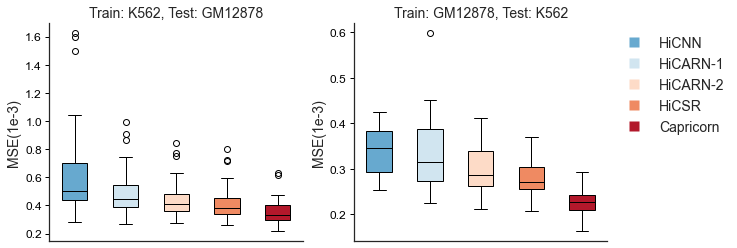

In [7]:
%matplotlib inline
# Metric: MSE
late_time_color = ["#67a9cf","#d1e5f0",  "#fddbc7", "#ef8a62", "#b2182b"]
NUM=len(late_time_color)
ax = plot_settings.get_wider_axis(double=True)
ax = plt.subplot(1, 2, 1)
ax.tick_params("y",which="major",length=4,width = 1.0,colors = "black")

result_dir = results_root+'/main_results'

#'Train: K562, Test: GM12878'
c = 'GM12878'
labels = ['HiCNN', 'HiCARN-1', 'HiCARN-2', 'HiCSR', 'Capricorn']
metric_name = ['Image_metrics']
value_indices = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,'X')
results = [[] for _ in labels]
for id, l in enumerate(labels):
    l = l.replace('-', '_')
    for m in metric_name:
        file = f'{result_dir}/{l}/{c if l != "LC" else c.split("_")[0]}/{m}.tsv'
        data = pd.read_csv(file, sep='\t')
        for n in value_indices:
            results[id].append(data[data['chromosome'] == f'chr{n}']['MSE'].iloc[0] * 1000)

plot_utils.box_plot(ax, results, widths=0.5, 
    ylabel='MSE(1e-3)', box_colors=late_time_color, xticks=np.arange(1, NUM+1, 1), xticklabels=['' for i in range(NUM)], xlabel='')
complete_col_list = late_time_color
lp = lambda i: plt.plot([],color=complete_col_list[i], ms=10, mec="none", label=labels[i], ls="",  marker="s")[0]
handles = [lp(i) for i in range(NUM)]
plot_utils.format_ax(ax)

plt.title('Train: K562, Test: GM12878')

ax = plt.subplot(1, 2, 2)
ax.tick_params("y",which="major",length=4,width = 1.0,colors = "black")
#'Train: GM12878, Test: K562'
c = 'K562'
labels = ['HiCNN', 'HiCARN-1', 'HiCARN-2', 'HiCSR', 'Capricorn']
metric_name = ['Image_metrics']
value_indices = (1,2,3,4,5,6,7,8  ,10,11,12,13,14,15,16,17,18,19,20,21,22,'X')
results = [[] for _ in labels]
for id, l in enumerate(labels):
    l = l.replace('-', '_')
    for m in metric_name:
        file = f'{result_dir}/{l}/{c if l != "LC" else c.split("_")[0]}/{m}.tsv'
        data = pd.read_csv(file, sep='\t')
        for n in value_indices:
            results[id].append(data[data['chromosome'] == f'chr{n}']['MSE'].iloc[0] * 1000)

plot_utils.box_plot(ax, results, widths=0.5, 
    ylabel='MSE(1e-3)', box_colors=late_time_color, xticks=np.arange(1, NUM+1, 1), xticklabels=['' for i in range(NUM)], xlabel='')
complete_col_list = late_time_color
lp = lambda i: plt.plot([],color=complete_col_list[i], ms=10, mec="none",
                        label=labels[i], ls="",  marker="s")[0]
handles = [lp(i) for i in range(NUM)]
plot_utils.format_legend(ax, handles, labels)

plot_utils.put_legend_outside_plot(ax, anchorage=(1, 1))
plot_utils.format_ax(ax)
plt.title('Train: GM12878, Test: K562')
plt.savefig(fig_dir + 'TestMSE.pdf')


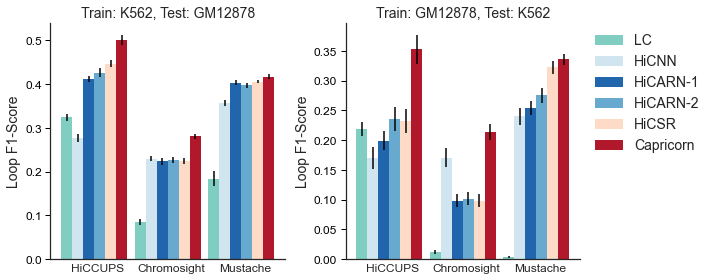

In [22]:
%matplotlib inline
#Cross-chromosome experiments
ax = plot_settings.get_wider_axis(double=True)
ax = plt.subplot(1, 2, 1)
model_ordering = plot_settings.get_model_ordering([mod for mod in plot_settings.EVO_DEVO_MODELS if mod != 'prescient'])
nested_color = ["#80cdc1","#d1e5f0", "#2166ac", "#67a9cf", "#fddbc7", "#b2182b"]
labels = [plot_settings.get_model_name_conventions(mod) for mod in model_ordering]

result_dir = results_root+'/main_results'

#GM12878
#### FILL YOUR MEANS BELOW ####
# means = [[0.3233139677994048, 0.2763847810992628, 0.411188882133692, 0.4258969892718304, 0.4463254612237951, 0.5000423611570957], [0.0855935105343683, 0.2294608440429859, 0.2230377556624129, 0.2257517904062755, 0.224743953003677, 0.2802053180876185], [0.1841311983590909, 0.356143779685088, 0.4023747086316369, 0.396368831272394, 0.4050644736427761, 0.4164796924201034]]
# stderrs = [[0.0085118248906868, 0.0084409156109784, 0.0063584372077054, 0.0096402982990734, 0.0089474416435504, 0.012238873610832], [0.0072718518216755, 0.0051756552088101, 0.0074154905864106, 0.0068616267754776, 0.0066036837544393, 0.0052796584679962], [0.0168535243035928, 0.0075129813049438, 0.0058478698184066, 0.0055288459782422, 0.0033081343214004, 0.0055597255389242]]
c = 'GM12878'

labels = ['LC', 'HiCNN', 'HiCARN-1', 'HiCARN-2', 'HiCSR', 'Capricorn']
metric_name = ['HiCCUPS', 'Chromosight', 'Mustache']

means = [[] for _ in metric_name]
stderrs = [[] for _ in metric_name]

for l in labels:
    l = l.replace('-', '_')
    for id, m in enumerate(metric_name):
        if m != 'HiCCUPS': m = m.lower()
        file = f'{result_dir}/{l}/{c if l != "LC" else c.split("_")[0]}/{m}.tsv'
        data = pd.read_csv(file, sep='\t')
        means[id].append(data[data['chromosome'] == f'average']['F1 score'].iloc[0])
        stderrs[id].append(data[data['chromosome'] == f'standard error']['F1 score'].iloc[0])
#### FILL YOUR RESULTS ABOVE ####


plot_utils.grouped_barplot(
    ax, means, metric_name,
    xlabel='', ylabel='Loop F1-Score', nested_errs=stderrs,
    nested_color=nested_color, tickloc_top=False, rotangle=0, anchorpoint='center',
    min_val=0.0, ecolor='black')

plot_utils.format_ax(ax)
ax.tick_params("y",which="major",
                length=5,width = 1,
                colors = "black")
plt.title('Train: K562, Test: GM12878')

ax = plt.subplot(1, 2, 2)
model_ordering = plot_settings.get_model_ordering([mod for mod in plot_settings.EVO_DEVO_MODELS if mod != 'prescient'])
labels = [plot_settings.get_model_name_conventions(mod) for mod in model_ordering]
#K562
#### FILL YOUR MEANS BELOW ####
# means = [[0.2189466998611314, 0.1703842298045505, 0.1992063126842164, 0.2360662173424376, 0.2324804349581967, 0.3524480166076592], [0.0123613007472636, 0.1705167161492156, 0.0985737689008527, 0.1015704447076672, 0.0984821882669517, 0.2137203511853003], [0.0041195291811526, 0.2399431618355007, 0.2540332260228851, 0.2750292975182399, 0.3221591052028527, 0.3356890507482735]]
# stderrs = [[0.011642135146564, 0.0181477600069106, 0.015844177770566, 0.0201628506967174, 0.0203881678606633, 0.0247204323625226], [0.0027292214100504, 0.0155938394961624, 0.0109594893383324, 0.0110673845139417, 0.0104664745964805, 0.0138837173488752], [0.0017108112241933, 0.014553852400632, 0.0119779758489876, 0.0122409062531671, 0.0106697141621329, 0.009619230084265]]
c = 'K562'

labels = ['LC', 'HiCNN', 'HiCARN-1', 'HiCARN-2', 'HiCSR', 'Capricorn']
metric_name = ['HiCCUPS', 'Chromosight', 'Mustache']

means = [[] for _ in metric_name]
stderrs = [[] for _ in metric_name]

for l in labels:
    l = l.replace('-', '_')
    for id, m in enumerate(metric_name):
        if m != 'HiCCUPS': m = m.lower()
        file = f'{result_dir}/{l}/{c if l != "LC" else c.split("_")[0]}/{m}.tsv'
        data = pd.read_csv(file, sep='\t')
        means[id].append(data[data['chromosome'] == f'average']['F1 score'].iloc[0])
        stderrs[id].append(data[data['chromosome'] == f'standard error']['F1 score'].iloc[0])

#### FILL YOUR RESULTS ABOVE ####

plot_utils.grouped_barplot(
    ax, means, metric_name,
    xlabel='', ylabel='Loop F1-Score', color_legend=labels, nested_errs=stderrs,
    nested_color=nested_color, tickloc_top=False, rotangle=0, anchorpoint='center',
    legend_loc='upper left', min_val=0.0, ecolor='black')
plot_utils.format_ax(ax)
plot_utils.format_legend(ax, *ax.get_legend_handles_labels(), loc='upper right', 
                        ncols=2)
plot_utils.put_legend_outside_plot(ax, anchorage=(1.01, 1.01))
ax.tick_params("y",which="major",
                length=5,width = 1,
                colors = "black")

plt.title('Train: GM12878, Test: K562')
plt.tight_layout()
plt.savefig(fig_dir + 'cross_cell_line_loops.pdf')

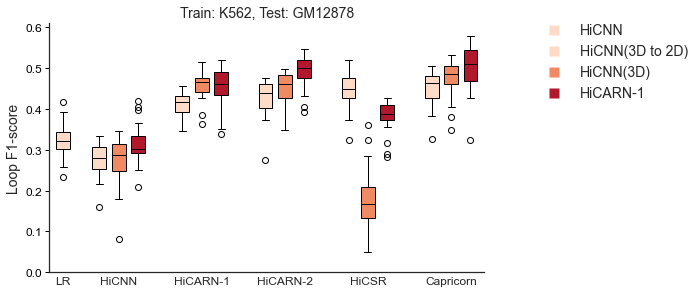

In [16]:
%matplotlib inline
#Ablation Study: 'Train: K562, Test: GM12878' 
late_time_color = ["#fddbc7"] + ["#fddbc7", "#ef8a62", "#b2182b"] * 5
NUM=len(late_time_color)

result_dir = results_root+'/IO_ablation_results'

ax = plot_settings.get_wider_axis(double=True)

ax.tick_params("y",which="major",length=4,width = 1.0,colors = "black")
#### FILL YOUR RESULTS BELOW ####
celllines = ['GM12878', 'GM12878_I', 'GM12878_IO']
labels = ['LC', 'HiCNN', 'HiCARN-1', 'HiCARN-2', 'HiCSR', 'Capricorn']
metric_name = ['HiCCUPS']
value_indices = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,'X')
results = [[] for _ in late_time_color]
id = 0
for l in labels:
    for c in celllines:
        l = l.replace('-', '_')
        if l=='LC' and '_' in c: break
        for m in metric_name:
            file = f'{result_dir}/{l}/{c}/{m}.tsv'
            data = pd.read_csv(file, sep='\t')
            for n in value_indices:
                results[id].append(data[data['chromosome'] == f'chr{n}']['F1 score'].iloc[0])
        id += 1
#### FILL YOUR RESULTS ABOVE ####
complete_name_list = ['HiCNN', 'HiCNN(3D to 2D)', 'HiCNN(3D)', 'HiCARN-1', 'HiCARN-1(3D to 2D)', 'HiCARN-1(3D)', 'HiCARN-2', 
                      'HiCARN-2(3D to 2D)', 'HiCARN-2(3D)',
                      'HiCSR', 'HiCSR(3D to 2D)',  'HiCSR(3D)', 'Capricorn (2D)', 'Capricorn (3D to 2D)', 'Capricorn (3D)']
xticklabels = ['' for i in range(NUM)]
xticklabels[0] = 'LR'
xticklabels[2] = 'HiCNN'
xticklabels[5] = 'HiCARN-1'
xticklabels[8] = 'HiCARN-2'
xticklabels[11] = 'HiCSR'
xticklabels[14] = 'Capricorn'
positions = [0, 1.3, 2, 2.7, 4.3, 5, 5.7, 7.3, 8, 8.7, 10.3, 11, 11.7, 13.3, 14, 14.7]
plot_utils.box_plot(ax, results, widths=0.5, 
    ylabel='Loop F1-score', box_colors=late_time_color, xticks=np.arange(0, NUM, 1), xticklabels=xticklabels, xlabel='', positions=positions)
complete_col_list = late_time_color
lp = lambda i: plt.plot([],color=complete_col_list[i], ms=10, mec="none",
                        label=complete_name_list[i], ls="",  marker="s")[0]
handles = [lp(i) for i in range(NUM // 4)]
type_name_list = ["Primary channel only", "5-channel input only", "Full 5-channel model"]
plot_utils.format_legend(ax, handles, type_name_list[:3])
plt.ylim(0.0, 0.61)
plot_utils.put_legend_outside_plot(ax)
plot_utils.format_ax(ax)
plt.tight_layout()
plt.title('Train: K562, Test: GM12878')
plt.savefig(fig_dir + 'TestGM12878_IO_ablation_with_lr.pdf')


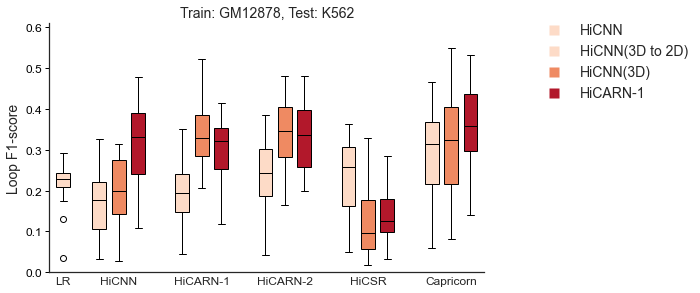

In [17]:
%matplotlib inline
#Ablation Study: 'Train: K562, Test: GM12878' 
late_time_color = ["#fddbc7"] + ["#fddbc7", "#ef8a62", "#b2182b"] * 5
NUM=len(late_time_color)

result_dir = results_root+'/IO_ablation_results'

ax = plot_settings.get_wider_axis(double=True)

ax.tick_params("y",which="major",length=4,width = 1.0,colors = "black")
#### FILL YOUR RESULTS BELOW ####
celllines = ['K562', 'K562_I', 'K562_IO']
labels = ['LC', 'HiCNN', 'HiCARN-1', 'HiCARN-2', 'HiCSR', 'Capricorn']
metric_name = ['HiCCUPS']
value_indices = (1,2,3,4,5,6,7,8 ,10,11,12,13,14,15,16,17,18,19,20,21,22,'X')
results = [[] for _ in late_time_color]
id = 0
for l in labels:
    for c in celllines:
        l = l.replace('-', '_')
        if l=='LC' and '_' in c: break
        for m in metric_name:
            file = f'{result_dir}/{l}/{c}/{m}.tsv'
            data = pd.read_csv(file, sep='\t')
            for n in value_indices:
                results[id].append(data[data['chromosome'] == f'chr{n}']['F1 score'].iloc[0])
        id += 1
#### FILL YOUR RESULTS ABOVE ####
complete_name_list = ['HiCNN', 'HiCNN(3D to 2D)', 'HiCNN(3D)', 'HiCARN-1', 'HiCARN-1(3D to 2D)', 'HiCARN-1(3D)', 'HiCARN-2', 
                      'HiCARN-2(3D to 2D)', 'HiCARN-2(3D)',
                      'HiCSR', 'HiCSR(3D to 2D)',  'HiCSR(3D)', 'Capricorn (2D)', 'Capricorn (3D to 2D)', 'Capricorn (3D)']
xticklabels = ['' for i in range(NUM)]
xticklabels[0] = 'LR'
xticklabels[2] = 'HiCNN'
xticklabels[5] = 'HiCARN-1'
xticklabels[8] = 'HiCARN-2'
xticklabels[11] = 'HiCSR'
xticklabels[14] = 'Capricorn'
positions = [0, 1.3, 2, 2.7, 4.3, 5, 5.7, 7.3, 8, 8.7, 10.3, 11, 11.7, 13.3, 14, 14.7]
plot_utils.box_plot(ax, results, widths=0.5, 
    ylabel='Loop F1-score', box_colors=late_time_color, xticks=np.arange(0, NUM, 1), xticklabels=xticklabels, xlabel='', positions=positions)
complete_col_list = late_time_color
lp = lambda i: plt.plot([],color=complete_col_list[i], ms=10, mec="none",
                        label=complete_name_list[i], ls="",  marker="s")[0]
handles = [lp(i) for i in range(NUM // 4)]
type_name_list = ["Primary channel only", "5-channel input only", "Full 5-channel model"]
plot_utils.format_legend(ax, handles, type_name_list[:3])
plt.ylim(0.0, 0.61)
plot_utils.put_legend_outside_plot(ax)
plot_utils.format_ax(ax)
plt.tight_layout()
plt.title('Train: GM12878, Test: K562')
plt.savefig(fig_dir + 'TestK562_IO_ablation_with_lr.pdf')


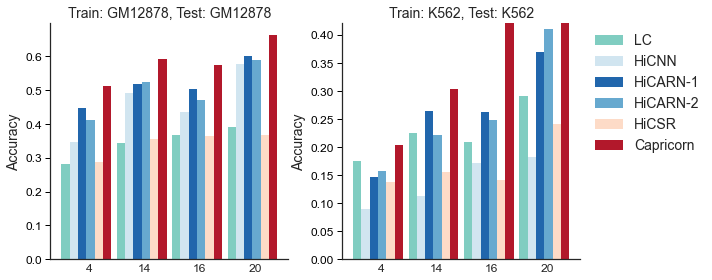

In [25]:
%matplotlib inline
#Cross-chromosome experiments
ax = plot_settings.get_wider_axis(double=True)
ax = plt.subplot(1, 2, 1)
model_ordering = plot_settings.get_model_ordering([mod for mod in plot_settings.EVO_DEVO_MODELS if mod != 'prescient'])
nested_color = ["#80cdc1", "#d1e5f0", "#2166ac", "#67a9cf", "#fddbc7", "#b2182b"]
labels = [plot_settings.get_model_name_conventions(mod) for mod in model_ordering]

result_dir = results_root+'/crosschromosome_results'

#Train: GM12878, Test: GM12878
g = 'GM12878_TrainGM12878'
labels = ['LC', 'HiCNN', 'HiCARN-1', 'HiCARN-2', 'HiCSR', 'Capricorn']
metric_name = ['HiCCUPS']
means = [[] for _ in range(4)]
for l in labels:
    l = l.replace('-', '_')
    for m in metric_name:
        file = f'{result_dir}/{l}/{g if l != "LC" else g.split("_")[0]}/{m}.tsv'
        data = pd.read_csv(file, sep='\t')

        for id, chr in enumerate(['chr4', 'chr14', 'chr16', 'chr20']):
            means[id].append(data[data['chromosome'] == chr]['F1 score'].iloc[0])

# means = [[0.2818386754074573, 0.3468753134717625, 0.4472322919636675, 0.4113475177304965, 0.2865725443075999, 0.5104432522527215], [0.3437938418371114, 0.4922750681611633, 0.5186855670103093, 0.5231514784386476, 0.3555147621232981, 0.5904115362272618], [0.3670222605907381, 0.4349401639464033, 0.5012414195998247, 0.4697492585602589, 0.3654320987654321, 0.5738655270854861], [0.3916184108411438, 0.5765310420352118, 0.6010687022900763, 0.5873391700163353, 0.3674955942823575, 0.6632020393059781]]

metric_name = ['4', '14', '16', '20']

plot_utils.grouped_barplot(
    ax, means, metric_name,
    xlabel='', ylabel='Accuracy', 
    nested_color=nested_color, tickloc_top=False, rotangle=0, anchorpoint='center',
    min_val=0.0, ecolor='black')
plot_utils.format_ax(ax)

ax.tick_params("y",which="major",
                length=5,width = 1,
                colors = "black")
plt.title('Train: GM12878, Test: GM12878')

ax = plt.subplot(1, 2, 2)
model_ordering = plot_settings.get_model_ordering([mod for mod in plot_settings.EVO_DEVO_MODELS if mod != 'prescient'])
labels = [plot_settings.get_model_name_conventions(mod) for mod in model_ordering]
#Train: K562, Test: K562
g = 'K562_TrainK562'
labels = ['LC', 'HiCNN', 'HiCARN-1', 'HiCARN-2', 'HiCSR', 'Capricorn']
metric_name = ['HiCCUPS']
means = [[] for _ in range(4)]
for l in labels:
    l = l.replace('-', '_')
    for m in metric_name:
        file = f'{result_dir}/{l}/{g if l != "LC" else g.split("_")[0]}/{m}.tsv'
        data = pd.read_csv(file, sep='\t')

        for id, chr in enumerate(['chr4', 'chr14', 'chr16', 'chr20']):
            means[id].append(data[data['chromosome'] == chr]['F1 score'].iloc[0])

# means = [[0.2818386754074573, 0.3468753134717625, 0.4472322919636675, 0.4113475177304965, 0.2865725443075999, 0.5104432522527215], [0.3437938418371114, 0.4922750681611633, 0.5186855670103093, 0.5231514784386476, 0.3555147621232981, 0.5904115362272618], [0.3670222605907381, 0.4349401639464033, 0.5012414195998247, 0.4697492585602589, 0.3654320987654321, 0.5738655270854861], [0.3916184108411438, 0.5765310420352118, 0.6010687022900763, 0.5873391700163353, 0.3674955942823575, 0.6632020393059781]]

metric_name = ['4', '14', '16', '20']


plot_utils.grouped_barplot(
    ax, means, metric_name,
    xlabel='', ylabel='Accuracy', color_legend=labels,
    nested_color=nested_color, tickloc_top=False, rotangle=0, anchorpoint='center',
    legend_loc='upper left', min_val=0.0, ecolor='black')
plot_utils.format_ax(ax)
plot_utils.format_legend(ax, *ax.get_legend_handles_labels(), loc='upper right', 
                        ncols=2)
plot_utils.put_legend_outside_plot(ax, anchorage=(1.01, 1.01))
ax.tick_params("y",which="major",
                length=5,width = 1,
                colors = "black")

plt.title('Train: K562, Test: K562')
plt.tight_layout()
plt.ylim(0.0, 0.42)
plt.savefig(fig_dir + 'cross_chromosome.pdf')


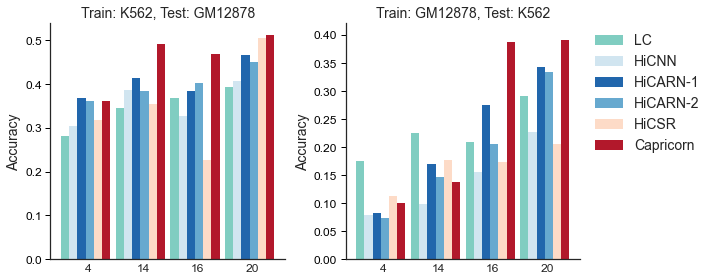

In [26]:
%matplotlib inline
#Cross-chromosome+Cross Cell-line experiments
ax = plot_settings.get_wider_axis(double=True)
ax = plt.subplot(1, 2, 1)
model_ordering = plot_settings.get_model_ordering([mod for mod in plot_settings.EVO_DEVO_MODELS if mod != 'prescient'])
nested_color = ["#80cdc1", "#d1e5f0", "#2166ac", "#67a9cf", "#fddbc7", "#b2182b"]
labels = [plot_settings.get_model_name_conventions(mod) for mod in model_ordering]

result_dir = results_root+'/crosschromosome_results'

#Train: K562, Test: GM12878
#### FILL YOUR RESULTS BELOW ####
g = 'GM12878_TrainK562'
labels = ['LC', 'HiCNN', 'HiCARN-1', 'HiCARN-2', 'HiCSR', 'Capricorn']
metric_name = ['HiCCUPS']
means = [[] for _ in range(4)]
for l in labels:
    l = l.replace('-', '_')
    for m in metric_name:
        file = f'{result_dir}/{l}/{g if l != "LC" else g.split("_")[0]}/{m}.tsv'
        data = pd.read_csv(file, sep='\t')

        for id, chr in enumerate(['chr4', 'chr14', 'chr16', 'chr20']):
            means[id].append(data[data['chromosome'] == chr]['F1 score'].iloc[0])
metric_name = ['4', '14', '16', '20']

plot_utils.grouped_barplot(
    ax, means, metric_name,
    xlabel='', ylabel='Accuracy', 
    nested_color=nested_color, tickloc_top=False, rotangle=0, anchorpoint='center',
    min_val=0.0, ecolor='black')
plot_utils.format_ax(ax)

ax.tick_params("y",which="major",
                length=5,width = 1,
                colors = "black")
plt.title('Train: K562, Test: GM12878')

ax = plt.subplot(1, 2, 2)
model_ordering = plot_settings.get_model_ordering([mod for mod in plot_settings.EVO_DEVO_MODELS if mod != 'prescient'])
labels = [plot_settings.get_model_name_conventions(mod) for mod in model_ordering]
#Train: GM12878, Test: K562
#### FILL YOUR RESULTS BELOW ####
g = 'K562_TrainGM12878'
labels = ['LC', 'HiCNN', 'HiCARN-1', 'HiCARN-2', 'HiCSR', 'Capricorn']
metric_name = ['HiCCUPS']
means = [[] for _ in range(4)]
for l in labels:
    l = l.replace('-', '_')
    for m in metric_name:
        file = f'{result_dir}/{l}/{g if l != "LC" else g.split("_")[0]}/{m}.tsv'
        data = pd.read_csv(file, sep='\t')

        for id, chr in enumerate(['chr4', 'chr14', 'chr16', 'chr20']):
            means[id].append(data[data['chromosome'] == chr]['F1 score'].iloc[0])
metric_name = ['4', '14', '16', '20']


plot_utils.grouped_barplot(
    ax, means, metric_name,
    xlabel='', ylabel='Accuracy', color_legend=labels,
    nested_color=nested_color, tickloc_top=False, rotangle=0, anchorpoint='center',
    legend_loc='upper left', min_val=0.0, ecolor='black')
plot_utils.format_ax(ax)
plot_utils.format_legend(ax, *ax.get_legend_handles_labels(), loc='upper right', 
                        ncols=2)
plot_utils.put_legend_outside_plot(ax, anchorage=(1.01, 1.01))
ax.tick_params("y",which="major",
                length=5,width = 1,
                colors = "black")

plt.title('Train: GM12878, Test: K562')
plt.tight_layout()
plt.ylim(0.0, 0.42)
plt.savefig(fig_dir + 'cross_chromosome_cellline.pdf')
